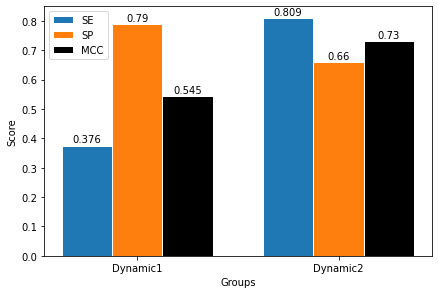

In [5]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

with open("E:/pythonProject1/Test/result_4_1.txt",'r') as f4_1:
    result4_1 = []
    for line in f4_1.readlines():
        result4_1.append(line.strip())
with open("E:/pythonProject1/Test/result_4_2.txt",'r') as f4_2:
    result4_2 = []
    for line in f4_2.readlines():
        result4_2.append(line.strip())
result4 = []
for i in [result4_1, result4_2]:
    result4.append(i)
    
with open("E:/pythonProject1/Test/target.txt",'r') as ft:
    target = []
    for line in ft.readlines():
        target.append(line.strip())
        
length = len(target)

TP_4 = [0, 0]
FN_4 = [0, 0]
FP_4 = [0, 0]
TN_4 = [0, 0]
SE_4 = [0, 0]
SP_4 = [0, 0]
MCC_4 = [0, 0]
for index in range(2): 
    for i in range(length):
        tmp_length = len(target[i])
        for j in range(tmp_length):
            if result4[index][i][j] == '(' and target[i][j] == '(' or result4[index][i][j] == ')' and target[i][j] == ')':
                TP_4[index] += 1
            if (result4[index][i][j] == '(' or result4[index][i][j] == ')') and target[i][j] == '.':
                FP_4[index] += 1
            if (target[i][j] == '(' or target[i][j] == ')') and result4[index][i][j] == '.':
                FN_4[index] += 1
            if result4[index][i][j] == '.' and target[i][j] == '.':
                TN_4[index] += 1
    SE_4[index] = TP_4[index] / (TP_4[index] + FN_4[index])
    SP_4[index] = TP_4[index] / (TP_4[index] + FP_4[index])
    MCC_4[index] = math.sqrt(SE_4[index] * SP_4[index])
    
fig, ax = plt.subplots()

barWidth = 0.25
r1 = np.arange(len(SE_4))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, SE_4, width=barWidth, edgecolor='white',label='SE' )
plt.bar(r2, SP_4, width=barWidth, edgecolor='white',label='SP' )
plt.bar(r3, MCC_4, width=barWidth, color='k',edgecolor='white',label='MCC' )

plt.tight_layout()  # 避免上下两图之间信息重叠
tick_spacing = 1   # 应对下表过于密集

plt.xticks([r + barWidth for r in range(len(SE_4))], ['Dynamic1','Dynamic2'])
    
for x,y in enumerate(SE_4):
    plt.text(x,y+0.01,"%s"%round(y,3),ha='center')  
for x,y in enumerate(SP_4):
    plt.text(x+0.25,y+0.01,"%s"%round(y,3),ha='center')
for x,y in enumerate(MCC_4):
    plt.text(x+0.5,y+0.01,"%s"%round(y,3),ha='center')
    
plt.legend()
plt.xlabel('Groups')
plt.ylabel('Score')
plt.show()